In [445]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import load_digits

# Q1

In [446]:
train_df = pd.read_csv('./train.csv')

Visualizing the data to find the correlation between survivors and non-surviors between males and females

C:\Users\Tigran\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


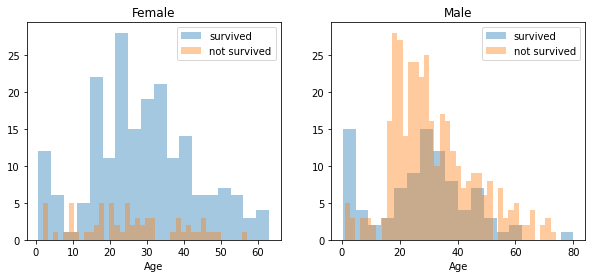

In [447]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Visualizing the data to find the correlation between survivors and non-surviors between the 3 classes

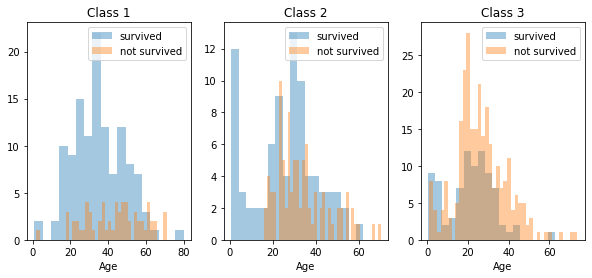

In [448]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10, 4))
class_1 = train_df[train_df['Pclass']==1]
class_2 = train_df[train_df['Pclass']==2]
class_3 = train_df[train_df['Pclass']==3]
ax = sns.distplot(class_1[class_1['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(class_1[class_1['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Class 1')
ax = sns.distplot(class_2[class_2['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(class_2[class_2['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Class 2')
ax = sns.distplot(class_3[class_3['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[2], kde = False)
ax = sns.distplot(class_3[class_3['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[2], kde = False)
ax.legend()
_ = ax.set_title('Class 3')

Import training csv and process the data. Removing unnecessary columns and removing rows with NaN values.

In [449]:
train_df = pd.read_csv('./train.csv').drop(['Cabin','Ticket','Parch','SibSp','Name','PassengerId'],axis=1).dropna()
test_df = pd.read_csv('./test.csv').drop(['Cabin','Ticket','Parch','SibSp','Name','PassengerId'],axis=1).dropna()

In [450]:
for dataset in train_df, test_df:
   dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [451]:
for dataset in train_df,test_df:
   dataset['Embarked'] = dataset['Embarked'].map( {'S': 2, 'C': 1, 'Q':0} ).astype(int)

Looking at the processed data

In [452]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,2
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,2
3,1,1,1,35.0,53.1000,2
4,0,3,0,35.0,8.0500,2
...,...,...,...,...,...,...
885,0,3,1,39.0,29.1250,0
886,0,2,0,27.0,13.0000,2
887,1,1,1,19.0,30.0000,2
889,1,1,0,26.0,30.0000,1


Split feature columns and target columns 

In [453]:
X = np.asarray(train_df[['Pclass','Sex','Age','Fare','Embarked']])

y = np.asarray(train_df['Survived'])

In [454]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

SVM Method

In [455]:
classifier = svm.SVC(kernel='linear', gamma='auto',C=2)
classifier.fit(X_train,y_train.ravel())

y_predict = classifier.predict(X_test)

In [456]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        82
           1       0.78      0.70      0.74        61

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



In [457]:
print(confusion_matrix(y_test,y_predict))

[[70 12]
 [18 43]]


In [458]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [ ]:
KNN Method

In [459]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print("KNN accuracy is:",acc_knn)

KNN accuracy is: 82.78


In [460]:
print(confusion_matrix(y_test,Y_pred))

[[61 21]
 [33 28]]


In [461]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

Multiple Naive Bayes Methods

In [462]:
BernNB = BernoulliNB()
BernNB.fit(X_train, y_train.ravel())
print(BernNB)

#y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_test,y_pred))

BernoulliNB()
0.7902097902097902


In [463]:
print(confusion_matrix(y_test,y_pred))

[[70 12]
 [18 43]]


In [464]:
MultiNB = MultinomialNB()

MultiNB.fit(X_train, y_train.ravel())
print(MultiNB)

y_pred = MultiNB.predict(X_test)
print(accuracy_score(y_test,y_pred))

MultinomialNB()
0.6643356643356644


In [465]:
print(confusion_matrix(y_test,y_pred))

[[71 11]
 [37 24]]


In [466]:
GausNB = GaussianNB()
GausNB.fit(X_train,y_train)
print(GausNB)

y_pred = GausNB.predict(X_test)
print(accuracy_score(y_test,y_pred))

GaussianNB()
0.7482517482517482


In [467]:
print(confusion_matrix(y_test,y_pred))

[[70 12]
 [24 37]]


# Q2

In [468]:
digits = load_digits()

Visualizing some of the images with matplotlib

<Figure size 432x288 with 0 Axes>

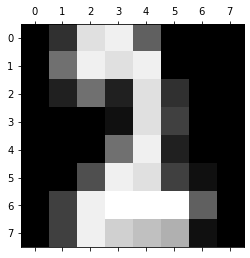

In [469]:
plt.gray()
plt.matshow(digits.images[1780])

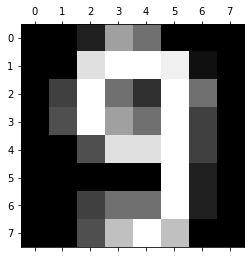

In [470]:
plt.matshow(digits.images[1795])

Looking at the dataset

In [471]:
data = pd.DataFrame(digits.data)

data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [472]:
target = pd.DataFrame(digits.target)

target

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


Splitting into feature and target columns

In [473]:
X = digits.data

y = digits.target

In [474]:
X_train, X_test, y_train ,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

SVM Method

In [475]:
classifier = svm.SVC(kernel='linear', gamma='auto',C=2)
classifier.fit(X_train,y_train.ravel())

y_predict = classifier.predict(X_test)

In [476]:
print("Actual:", y_test[6], "Prediction:", y_pred[6])
print("Actual:", y_test[55], "Prediction:", y_pred[55])

Actual: 1 Prediction: 1
Actual: 0 Prediction: 0


In [477]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      0.97      0.96        35
           2       0.97      1.00      0.99        36
           3       0.97      1.00      0.98        29
           4       0.97      1.00      0.98        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       1.00      0.97      0.99        39
           8       0.97      0.95      0.96        39
           9       0.97      0.95      0.96        41

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [478]:
print(confusion_matrix(y_test,y_predict))

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  1  1  0  0  0  0  0 37  0]
 [ 0  0  0  1  0  1  0  0  0 39]]


In [479]:
X = digits.data

y = digits.target

X_train, X_test, y_train ,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

KNN Method

In [480]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print("KNN accuracy is:",acc_knn)

KNN accuracy is: 99.1


In [481]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.97      0.99        35
           2       0.97      1.00      0.99        36
           3       0.93      0.97      0.95        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        44
           7       0.97      1.00      0.99        39
           8       1.00      0.95      0.97        39
           9       0.98      1.00      0.99        41

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [482]:
print(confusion_matrix(y_test,Y_pred))

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  1  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  1 28  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  0  0  2  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0  0  0 41]]


In [483]:
X = digits.data

y = digits.target

X_train, X_test, y_train ,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

Multiple Naive Bayes Methods

In [484]:
BernNB = BernoulliNB()
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect,y_pred))

BernoulliNB()
0.8444444444444444


In [485]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.74      0.57      0.65        35
           2       0.76      0.81      0.78        36
           3       0.74      0.86      0.79        29
           4       0.90      0.93      0.92        30
           5       0.94      0.80      0.86        40
           6       1.00      0.93      0.96        44
           7       0.87      1.00      0.93        39
           8       0.79      0.79      0.79        39
           9       0.74      0.78      0.76        41

    accuracy                           0.84       360
   macro avg       0.85      0.85      0.84       360
weighted avg       0.85      0.84      0.84       360



In [486]:
print(confusion_matrix(y_test,y_pred))

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 20  8  0  0  0  0  0  5  2]
 [ 0  1 29  4  0  0  0  1  1  0]
 [ 0  0  1 25  0  0  0  0  1  2]
 [ 0  0  0  0 28  0  0  2  0  0]
 [ 1  1  0  1  0 32  0  0  0  5]
 [ 0  1  0  0  1  1 41  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  4  0  1  0  0  0  1 31  2]
 [ 0  0  0  3  2  1  0  2  1 32]]


In [487]:
MultiNB = MultinomialNB()

MultiNB.fit(X_train, y_train)
print(MultiNB)

y_pred = MultiNB.predict(X_test)
print(accuracy_score(y_expect,y_pred))

MultinomialNB()
0.9083333333333333


In [488]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.83      0.71      0.77        35
           2       0.82      0.86      0.84        36
           3       1.00      0.90      0.95        29
           4       1.00      0.97      0.98        30
           5       0.97      0.85      0.91        40
           6       1.00      1.00      1.00        44
           7       0.89      1.00      0.94        39
           8       0.92      0.90      0.91        39
           9       0.77      0.90      0.83        41

    accuracy                           0.91       360
   macro avg       0.92      0.91      0.91       360
weighted avg       0.91      0.91      0.91       360



In [489]:
print(confusion_matrix(y_test,y_pred))

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 25  6  0  0  1  0  0  0  3]
 [ 1  2 31  0  0  0  0  0  1  1]
 [ 0  0  1 26  0  0  0  0  1  1]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 34  0  0  0  6]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  3  0  0  0  0  0  1 35  0]
 [ 0  0  0  0  0  0  0  3  1 37]]


In [490]:
GausNB = GaussianNB()
GausNB.fit(X_train,y_train)
print(GausNB)

y_pred = GausNB.predict(X_test)
print(accuracy_score(y_expect,y_pred))

GaussianNB()
0.825


In [491]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.66      0.89      0.76        35
           2       0.94      0.47      0.63        36
           3       0.89      0.83      0.86        29
           4       1.00      0.73      0.85        30
           5       0.97      0.88      0.92        40
           6       1.00      1.00      1.00        44
           7       0.74      1.00      0.85        39
           8       0.54      0.82      0.65        39
           9       0.96      0.63      0.76        41

    accuracy                           0.82       360
   macro avg       0.87      0.82      0.83       360
weighted avg       0.87      0.82      0.83       360



In [492]:
print(confusion_matrix(y_test,y_pred))

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  4  0]
 [ 0  7 17  0  0  0  0  0 12  0]
 [ 0  0  1 24  0  0  0  0  4  0]
 [ 0  1  0  0 22  0  0  7  0  0]
 [ 0  1  0  0  0 35  0  3  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  5  0  0  0  1  0  1 32  0]
 [ 0  2  0  3  0  0  0  3  7 26]]


KNN: Lower values seem to be better but choosing a value too low can lead to unstable results